In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_hr=pd.read_csv('Employee Attrition.csv')
df_hr.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [3]:
df_hr.shape

(1470, 35)

In [4]:
df_hr.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# EDA

In [5]:
df_hr['Attrition'] = df_hr['Attrition'].map(lambda x: 1 if x=='Yes' else 0)

In [211]:
df_hr.dtypes

Age                          int64
Attrition                    int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [212]:
integer = []
for column in df_hr:
    if df_hr[column].dtype == 'int64':
        integer.append(column)
integer

['Age',
 'Attrition',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [213]:
integer

['Age',
 'Attrition',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [214]:
df=df_hr[integer]
df.head()

Age  Attrition  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0   41          1       1102                 1          2              1   
1   49          0        279                 8          1              1   
2   37          1       1373                 2          2              1   
3   33          0       1392                 3          4              1   
4   27          0        591                 2          1              1   

   EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  ...  \
0               1                        2          94               3  ...   
1               2                        3          61               2  ...   
2               4                        4          92               2  ...   
3               5                        4          56               3  ...   
4               7                        1          40               3  ...   

   RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                         1             80                 0   
1                         4             80                 1   
2                         2             80                 0   
3                         3             80                 0   
4                         4             80                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2  

[5 rows x 27 columns]

In [215]:
df.describe()

Age  Attrition  DailyRate  DistanceFromHome  Education  \
count 1470.00    1470.00    1470.00           1470.00    1470.00   
mean    36.92       0.16     802.49              9.19       2.91   
std      9.14       0.37     403.51              8.11       1.02   
min     18.00       0.00     102.00              1.00       1.00   
25%     30.00       0.00     465.00              2.00       2.00   
50%     36.00       0.00     802.00              7.00       3.00   
75%     43.00       0.00    1157.00             14.00       4.00   
max     60.00       1.00    1499.00             29.00       5.00   

       EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  HourlyRate  \
count        1470.00         1470.00                  1470.00     1470.00   
mean            1.00         1024.87                     2.72       65.89   
std             0.00          602.02                     1.09       20.33   
min             1.00            1.00                     1.00       30.00   
25%             1.00          491.25                     2.00       48.00   
50%             1.00         1020.50                     3.00       66.00   
75%             1.00         1555.75                     4.00       83.75   
max             1.00         2068.00                     4.00      100.00   

       JobInvolvement  ...  RelationshipSatisfaction  StandardHours  \
count         1470.00  ...                   1470.00        1470.00   
mean             2.73  ...                      2.71          80.00   
std              0.71  ...                      1.08           0.00   
min              1.00  ...                      1.00          80.00   
25%              2.00  ...                      2.00          80.00   
50%              3.00  ...                      3.00          80.00   
75%              3.00  ...                      4.00          80.00   
max              4.00  ...                      4.00          80.00   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count           1470.00            1470.00                1470.00   
mean               0.79              11.28                   2.80   
std                0.85               7.78                   1.29   
min                0.00               0.00                   0.00   
25%                0.00               6.00                   2.00   
50%                1.00              10.00                   3.00   
75%                1.00              15.00                   3.00   
max                3.00              40.00                   6.00   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count          1470.00         1470.00             1470.00   
mean              2.76            7.01                4.23   
std               0.71            6.13                3.62   
min               1.00            0.00                0.00   
25%               2.00            3.00                2.00   
50%               3.00            5.00                3.00   
75%               3.00            9.00                7.00   
max               4.00           40.00               18.00   

       YearsSinceLastPromotion  YearsWithCurrManager  
count                  1470.00               1470.00  
mean                      2.19                  4.12  
std                       3.22                  3.57  
min                       0.00                  0.00  
25%                       0.00                  2.00  
50%                       1.00                  3.00  
75%                       3.00                  7.00  
max                      15.00                 17.00  

[8 rows x 27 columns]

In [216]:
viz=sweetviz.analyze([df,"Train"],target_feat='Attrition')


                                   |                         | [  0%]   00:00  -> (? left)
Summarizing dataframe:             |                         | [  0%]   00:00  -> (? left)
:TARGET::                          |▊                    | [  4%]   00:00  -> (00:00 left)
:TARGET::                          |█▌                   | [  7%]   00:00  -> (00:04 left)
:Age:                              |█▌                   | [  7%]   00:00  -> (00:04 left)
:Age:                              |██▎                  | [ 11%]   00:00  -> (00:07 left)
:DailyRate:                        |██▎                  | [ 11%]   00:00  -> (00:07 left)
:DailyRate:                        |███                  | [ 14%]   00:01  -> (00:09 left)
:DistanceFromHome:                 |███                  | [ 14%]   00:01  -> (00:09 left)
:DistanceFromHome:                 |███▊                 | [ 18%]   00:02  -> (00:12 left)
:Education:                        |███▊                 | [ 18%]   00:02  -> (00:12 left

Creating Associations graph... DONE!


In [217]:
viz.show_html('viz.html')

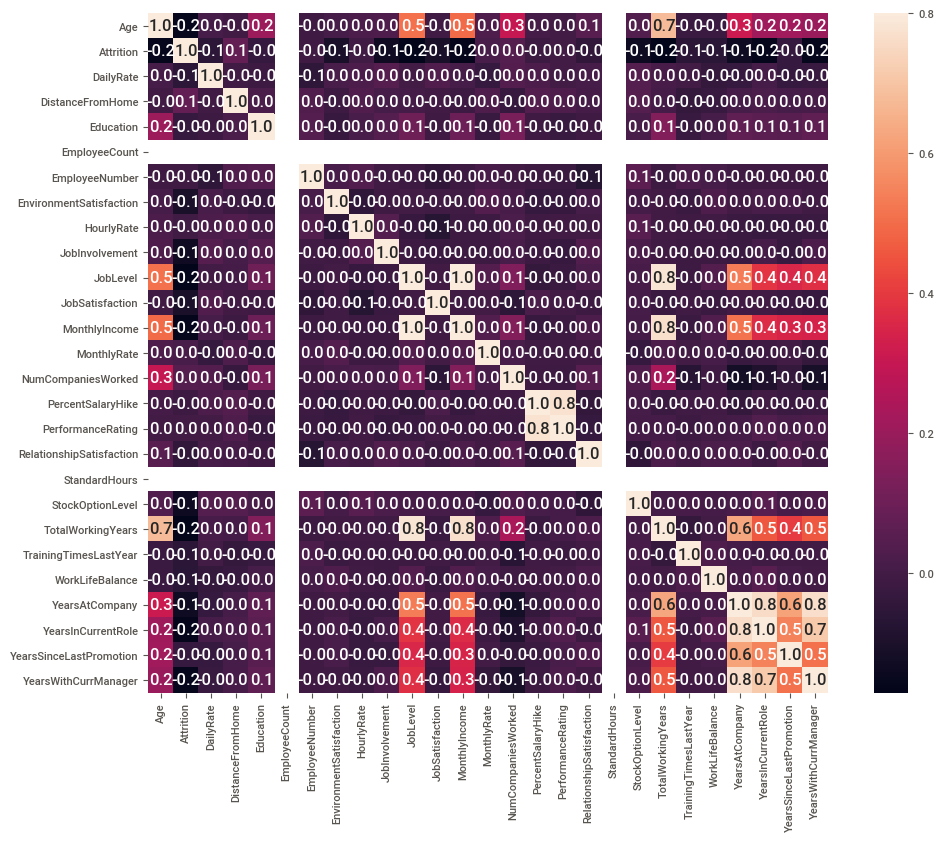

In [72]:
corrmat = df_hr.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,annot=True,fmt= '.1f',vmax=.8, square=True)

There is a correlation (0.8) between Performance Rating and Performance Salary Hike. We need to look into the white lines shown by EmployeeCount and Standard Hours.TotalWorkingYears with JobLevel also has high correlation(0.8).

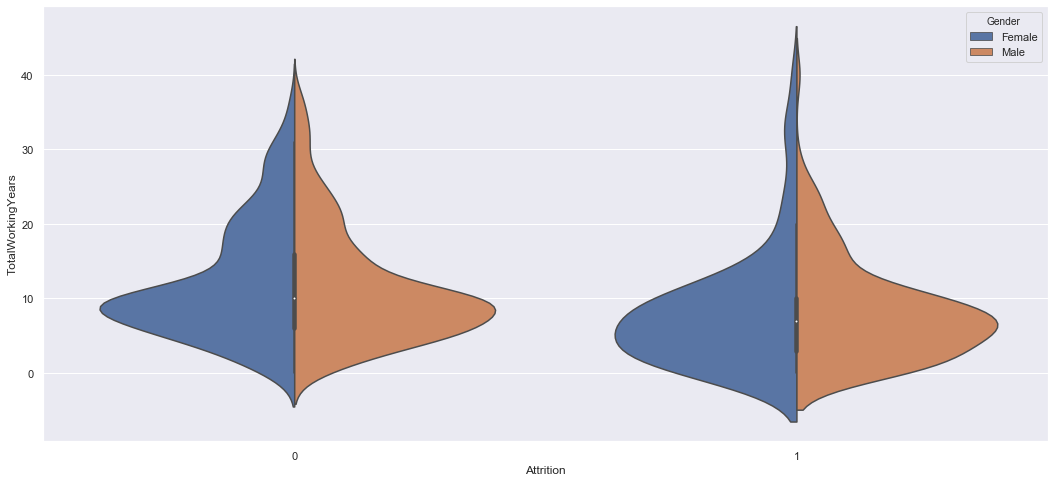

In [27]:
sns.set(rc={'figure.figsize': (18,8)})
sns.violinplot(df_hr['Attrition'],df_hr['TotalWorkingYears'],hue=df_hr['Gender'], split=True)

One can clearly infer from the plot above that higher proportion of males are likely for Attrition as compared to females.

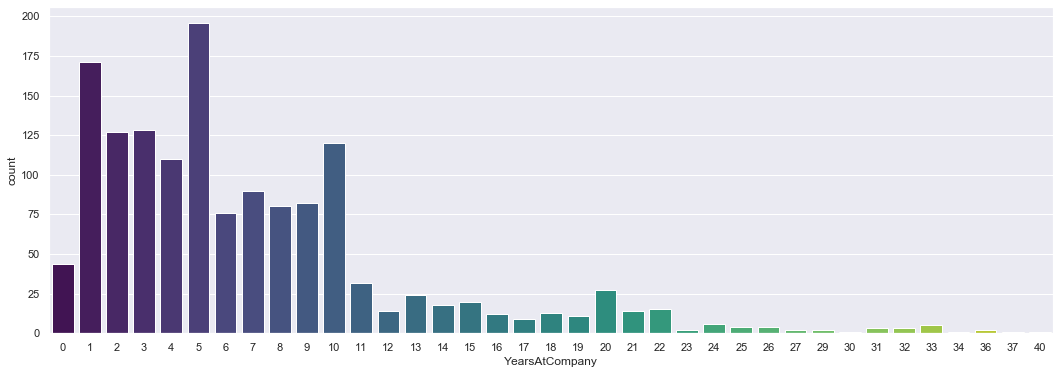

In [10]:
sns.set(rc={'figure.figsize': (18,6)})
sns.countplot(df_hr['YearsAtCompany'],palette='viridis')

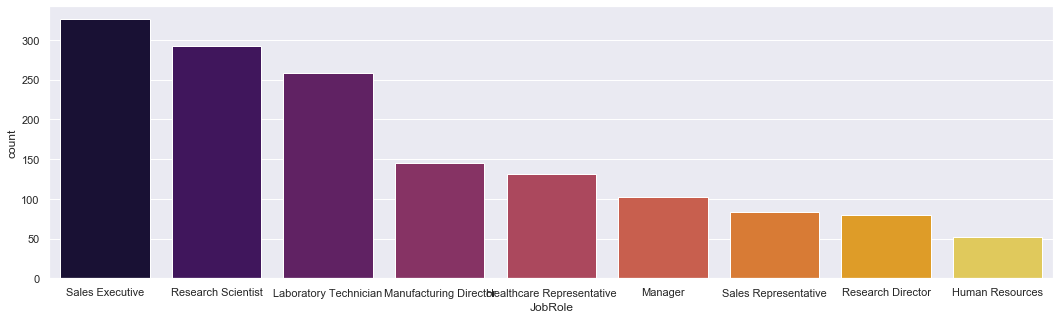

In [12]:
sns.set(rc={'figure.figsize': (18,5)})
sns.countplot(df_hr['JobRole'],palette='inferno',)

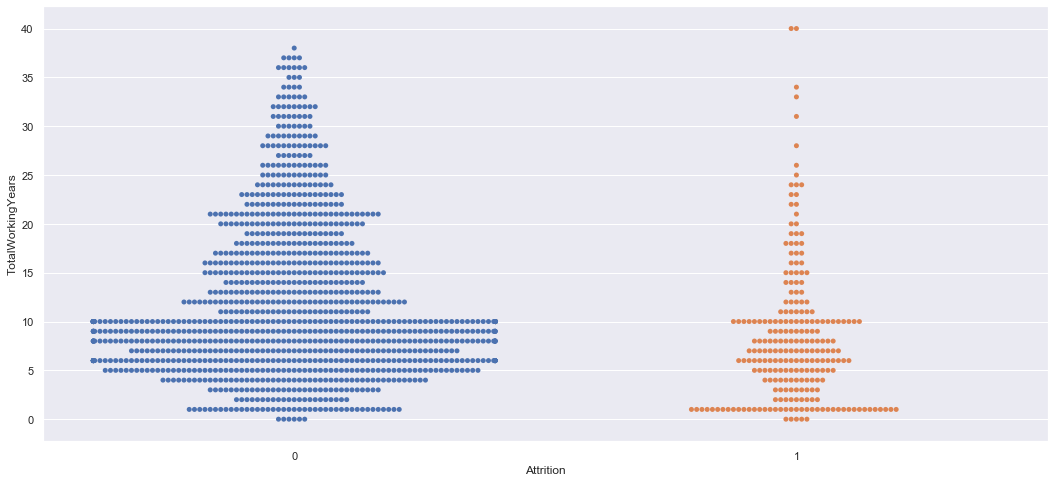

In [13]:
sns.set(rc={'figure.figsize': (18,8)})
sns.swarmplot(df_hr['Attrition'], df_hr['TotalWorkingYears'])

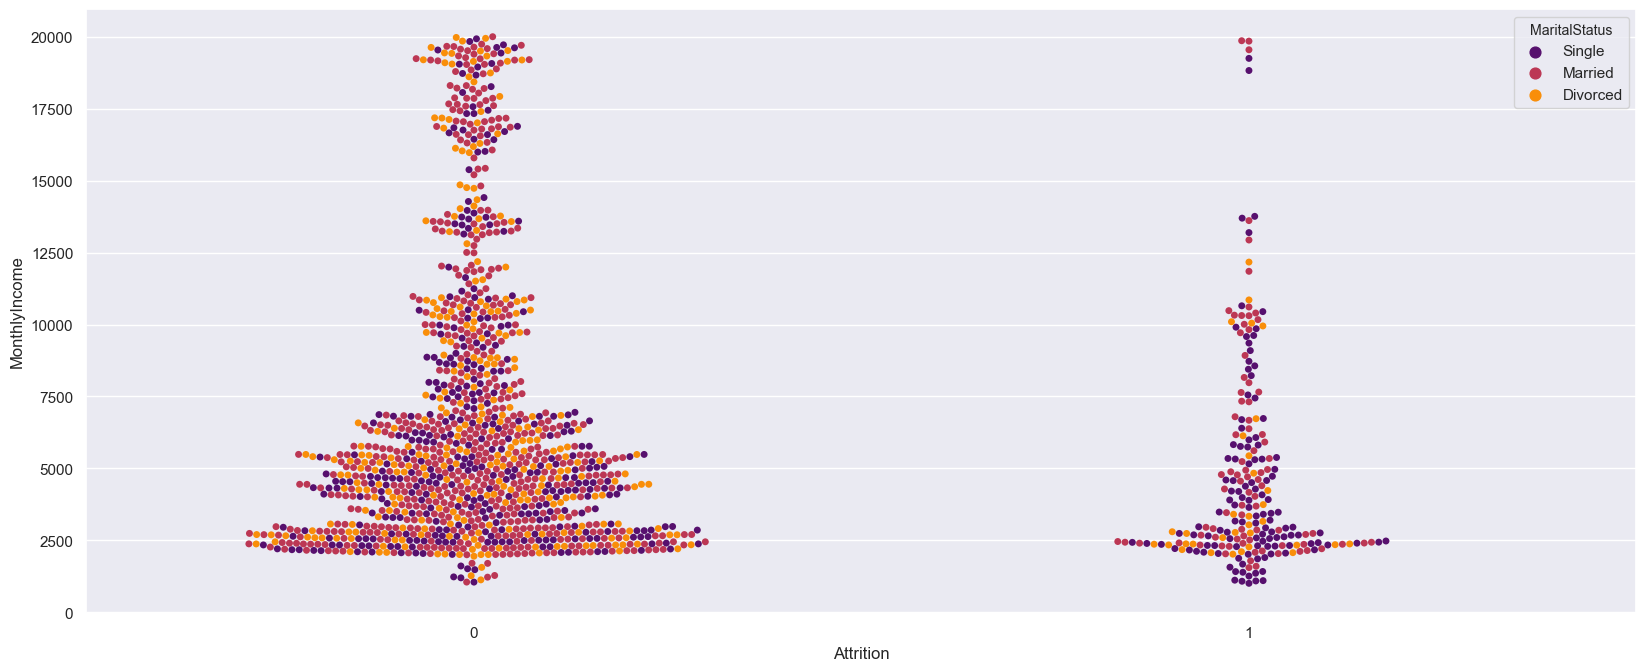

In [218]:
sns.set(rc={'figure.figsize': (20,8)})
sns.swarmplot(df_hr['Attrition'], df_hr['MonthlyIncome'], hue=df_hr['MaritalStatus'], palette='inferno')

The above plot shows those with lesser age and Lower income groups upto 5000 have higher possibility of Attrition

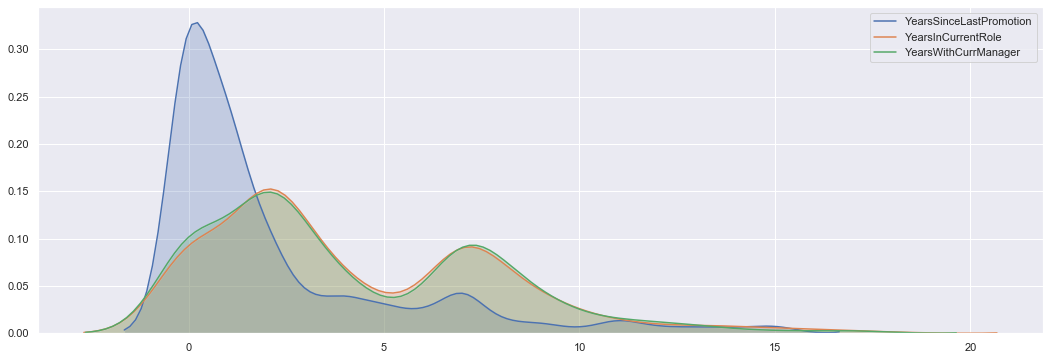

In [16]:
sns.set(rc={'figure.figsize': (18,6)})
sns.kdeplot(df_hr['YearsSinceLastPromotion'],shade=True)
sns.kdeplot(df_hr['YearsInCurrentRole'],shade=True)
sns.kdeplot(df_hr['YearsWithCurrManager'],shade=True)

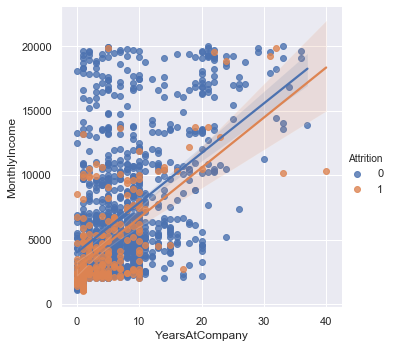

In [17]:
sns.set(rc={'figure.figsize': (18,8)})
sns.lmplot('YearsAtCompany','MonthlyIncome',data=df_hr,hue='Attrition')

### Conclusion

Most of the given features don't have a very strong correlation with Attrition.

Employees with higher experience (TotalWorkingYears) have less chance of attrition.

Most of the employees are new and in their early years at the company. Mostly 0-5 years.

New employees have higher chance of attrition.

Employees with lower income are more likely to be chosen for attrition.

In [19]:
#Data cleaning
df_hr.head()

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [20]:
categorical = []
for column in df_hr:
    if df_hr[column].dtype == 'object':
        categorical.append(column)
categorical

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [21]:
cat = pd.DataFrame(df_hr.apply(pd.Series.nunique, axis = 0))
categorical = list(cat[cat[0]<=9].sort_values(0).reset_index()['index'])
categorical

['StandardHours',
 'EmployeeCount',
 'Over18',
 'Attrition',
 'Gender',
 'PerformanceRating',
 'OverTime',
 'BusinessTravel',
 'Department',
 'MaritalStatus',
 'StockOptionLevel',
 'RelationshipSatisfaction',
 'WorkLifeBalance',
 'JobInvolvement',
 'EnvironmentSatisfaction',
 'JobSatisfaction',
 'JobLevel',
 'Education',
 'EducationField',
 'TrainingTimesLastYear',
 'JobRole']

In [22]:
data = pd.get_dummies(df_hr, columns=categorical, drop_first=True)

In [23]:
data.head(5)

Age  DailyRate  DistanceFromHome  EmployeeNumber  HourlyRate  \
0   41       1102                 1               1          94   
1   49        279                 8               2          61   
2   37       1373                 2               4          92   
3   33       1392                 3               5          56   
4   27        591                 2               7          40   

   MonthlyIncome  MonthlyRate  NumCompaniesWorked  PercentSalaryHike  \
0           5993        19479                   8                 11   
1           5130        24907                   1                 23   
2           2090         2396                   6                 15   
3           2909        23159                   1                 11   
4           3468        16632                   9                 12   

   TotalWorkingYears  ...  TrainingTimesLastYear_5  TrainingTimesLastYear_6  \
0                  8  ...                        0                        0   
1                 10  ...                        0                        0   
2                  7  ...                        0                        0   
3                  8  ...                        0                        0   
4                  6  ...                        0                        0   

   JobRole_Human Resources  JobRole_Laboratory Technician  JobRole_Manager  \
0                        0                              0                0   
1                        0                              0                0   
2                        0                              1                0   
3                        0                              0                0   
4                        0                              1                0   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                           0                        1   
1                           1                        0   
2                           0                        0   
3                           1                        0   
4                           0                        0   

   JobRole_Sales Representative  
0                             0  
1                             0  
2                             0  
3                             0  
4                             0  

[5 rows x 69 columns]

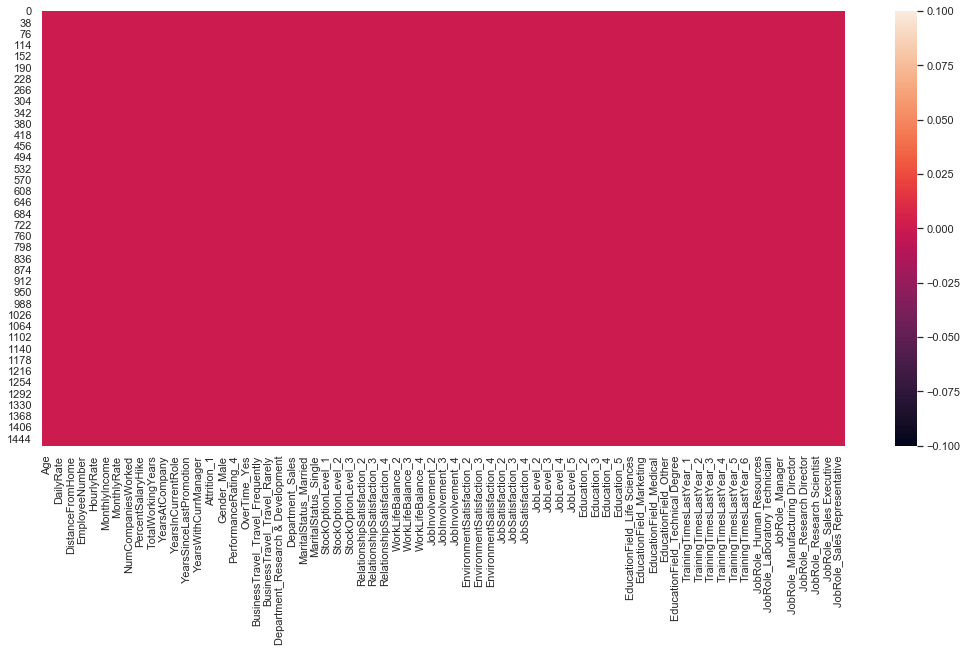

In [25]:
sns.heatmap(data.isna())

In [31]:
data.describe()

Age    DailyRate  DistanceFromHome  EmployeeNumber  \
count  1470.000000  1470.000000       1470.000000     1470.000000   
mean     36.923810   802.485714          9.192517     1024.865306   
std       9.135373   403.509100          8.106864      602.024335   
min      18.000000   102.000000          1.000000        1.000000   
25%      30.000000   465.000000          2.000000      491.250000   
50%      36.000000   802.000000          7.000000     1020.500000   
75%      43.000000  1157.000000         14.000000     1555.750000   
max      60.000000  1499.000000         29.000000     2068.000000   

        HourlyRate  MonthlyIncome   MonthlyRate  NumCompaniesWorked  \
count  1470.000000    1470.000000   1470.000000         1470.000000   
mean     65.891156    6502.931293  14313.103401            2.693197   
std      20.329428    4707.956783   7117.786044            2.498009   
min      30.000000    1009.000000   2094.000000            0.000000   
25%      48.000000    2911.000000   8047.000000            1.000000   
50%      66.000000    4919.000000  14235.500000            2.000000   
75%      83.750000    8379.000000  20461.500000            4.000000   
max     100.000000   19999.000000  26999.000000            9.000000   

       PercentSalaryHike  TotalWorkingYears  ...  TrainingTimesLastYear_5  \
count        1470.000000        1470.000000  ...              1470.000000   
mean           15.209524          11.279592  ...                 0.080952   
std             3.659938           7.780782  ...                 0.272855   
min            11.000000           0.000000  ...                 0.000000   
25%            12.000000           6.000000  ...                 0.000000   
50%            14.000000          10.000000  ...                 0.000000   
75%            18.000000          15.000000  ...                 0.000000   
max            25.000000          40.000000  ...                 1.000000   

       TrainingTimesLastYear_6  JobRole_Human Resources  \
count              1470.000000              1470.000000   
mean                  0.044218                 0.035374   
std                   0.205648                 0.184786   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max                   1.000000                 1.000000   

       JobRole_Laboratory Technician  JobRole_Manager  \
count                    1470.000000      1470.000000   
mean                        0.176190         0.069388   
std                         0.381112         0.254199   
min                         0.000000         0.000000   
25%                         0.000000         0.000000   
50%                         0.000000         0.000000   
75%                         0.000000         0.000000   
max                         1.000000         1.000000   

       JobRole_Manufacturing Director  JobRole_Research Director  \
count                     1470.000000                1470.000000   
mean                         0.098639                   0.054422   
std                          0.298279                   0.226925   
min                          0.000000                   0.000000   
25%                          0.000000                   0.000000   
50%                          0.000000                   0.000000   
75%                          0.000000                   0.000000   
max                          1.000000                   1.000000   

       JobRole_Research Scientist  JobRole_Sales Executive  \
count                 1470.000000              1470.000000   
mean                     0.198639                 0.221769   
std                      0.399112                 0.415578   
min                      0.000000                 0.000000   
25%                      0.000000                 0.000000   
50%                      0.0

In [50]:
data.columns.nunique()

69

In [51]:
import lazypredict

In [52]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

In [53]:
X = data.drop(['Attrition_1'],axis=1)
y = data['Attrition_1']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.5,random_state =123)
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models


 94%|████████████████████████████████████████████████████████████████████████████▋     | 29/31 [00:02<00:00, 11.69it/s]

Learning rate set to 0.009033
0:	learn: 0.6877016	total: 83.3ms	remaining: 1m 23s
1:	learn: 0.6821454	total: 95.4ms	remaining: 47.6s
2:	learn: 0.6771870	total: 105ms	remaining: 34.8s
3:	learn: 0.6726882	total: 114ms	remaining: 28.4s
4:	learn: 0.6673332	total: 119ms	remaining: 23.7s
5:	learn: 0.6626866	total: 128ms	remaining: 21.2s
6:	learn: 0.6568780	total: 132ms	remaining: 18.7s
7:	learn: 0.6518645	total: 136ms	remaining: 16.8s
8:	learn: 0.6478197	total: 138ms	remaining: 15.1s
9:	learn: 0.6432213	total: 141ms	remaining: 14s
10:	learn: 0.6385466	total: 144ms	remaining: 13s
11:	learn: 0.6343302	total: 148ms	remaining: 12.2s
12:	learn: 0.6303240	total: 154ms	remaining: 11.7s
13:	learn: 0.6260176	total: 159ms	remaining: 11.2s
14:	learn: 0.6218178	total: 163ms	remaining: 10.7s
15:	learn: 0.6176375	total: 167ms	remaining: 10.3s
16:	learn: 0.6134892	total: 171ms	remaining: 9.91s
17:	learn: 0.6097250	total: 174ms	remaining: 9.52s
18:	learn: 0.6057956	total: 178ms	remaining: 9.17s
19:	learn: 0

185:	learn: 0.3677705	total: 631ms	remaining: 2.76s
186:	learn: 0.3674198	total: 634ms	remaining: 2.75s
187:	learn: 0.3671349	total: 636ms	remaining: 2.75s
188:	learn: 0.3667903	total: 638ms	remaining: 2.74s
189:	learn: 0.3663317	total: 641ms	remaining: 2.73s
190:	learn: 0.3657948	total: 644ms	remaining: 2.73s
191:	learn: 0.3652576	total: 648ms	remaining: 2.73s
192:	learn: 0.3650074	total: 650ms	remaining: 2.72s
193:	learn: 0.3643071	total: 653ms	remaining: 2.71s
194:	learn: 0.3640312	total: 657ms	remaining: 2.71s
195:	learn: 0.3631685	total: 661ms	remaining: 2.71s
196:	learn: 0.3626441	total: 665ms	remaining: 2.71s
197:	learn: 0.3620044	total: 667ms	remaining: 2.7s
198:	learn: 0.3614062	total: 671ms	remaining: 2.7s
199:	learn: 0.3608408	total: 674ms	remaining: 2.7s
200:	learn: 0.3603033	total: 677ms	remaining: 2.69s
201:	learn: 0.3594550	total: 679ms	remaining: 2.68s
202:	learn: 0.3589795	total: 681ms	remaining: 2.67s
203:	learn: 0.3587087	total: 684ms	remaining: 2.67s
204:	learn: 0.3

349:	learn: 0.3018407	total: 1.11s	remaining: 2.06s
350:	learn: 0.3011592	total: 1.11s	remaining: 2.05s
351:	learn: 0.3009251	total: 1.11s	remaining: 2.05s
352:	learn: 0.3007792	total: 1.11s	remaining: 2.04s
353:	learn: 0.3001598	total: 1.12s	remaining: 2.04s
354:	learn: 0.2999091	total: 1.12s	remaining: 2.04s
355:	learn: 0.2995185	total: 1.13s	remaining: 2.04s
356:	learn: 0.2992632	total: 1.13s	remaining: 2.03s
357:	learn: 0.2986905	total: 1.13s	remaining: 2.03s
358:	learn: 0.2983116	total: 1.13s	remaining: 2.02s
359:	learn: 0.2979778	total: 1.14s	remaining: 2.02s
360:	learn: 0.2977104	total: 1.14s	remaining: 2.02s
361:	learn: 0.2974962	total: 1.14s	remaining: 2.01s
362:	learn: 0.2972758	total: 1.15s	remaining: 2.01s
363:	learn: 0.2970717	total: 1.15s	remaining: 2s
364:	learn: 0.2964678	total: 1.15s	remaining: 2s
365:	learn: 0.2963016	total: 1.15s	remaining: 2s
366:	learn: 0.2958304	total: 1.16s	remaining: 1.99s
367:	learn: 0.2954790	total: 1.16s	remaining: 1.99s
368:	learn: 0.2950952

529:	learn: 0.2497916	total: 1.59s	remaining: 1.41s
530:	learn: 0.2495820	total: 1.59s	remaining: 1.41s
531:	learn: 0.2493285	total: 1.6s	remaining: 1.41s
532:	learn: 0.2489360	total: 1.6s	remaining: 1.4s
533:	learn: 0.2487878	total: 1.61s	remaining: 1.4s
534:	learn: 0.2486070	total: 1.61s	remaining: 1.4s
535:	learn: 0.2482909	total: 1.61s	remaining: 1.4s
536:	learn: 0.2480638	total: 1.62s	remaining: 1.39s
537:	learn: 0.2478235	total: 1.62s	remaining: 1.39s
538:	learn: 0.2477185	total: 1.62s	remaining: 1.39s
539:	learn: 0.2474485	total: 1.63s	remaining: 1.39s
540:	learn: 0.2471775	total: 1.63s	remaining: 1.38s
541:	learn: 0.2468878	total: 1.63s	remaining: 1.38s
542:	learn: 0.2467218	total: 1.64s	remaining: 1.38s
543:	learn: 0.2466784	total: 1.64s	remaining: 1.37s
544:	learn: 0.2464097	total: 1.64s	remaining: 1.37s
545:	learn: 0.2461785	total: 1.64s	remaining: 1.37s
546:	learn: 0.2459847	total: 1.65s	remaining: 1.36s
547:	learn: 0.2458209	total: 1.65s	remaining: 1.36s
548:	learn: 0.2455

695:	learn: 0.2120150	total: 2.07s	remaining: 904ms
696:	learn: 0.2118093	total: 2.07s	remaining: 901ms
697:	learn: 0.2116096	total: 2.08s	remaining: 898ms
698:	learn: 0.2114243	total: 2.08s	remaining: 895ms
699:	learn: 0.2112090	total: 2.08s	remaining: 892ms
700:	learn: 0.2111533	total: 2.08s	remaining: 889ms
701:	learn: 0.2109919	total: 2.09s	remaining: 887ms
702:	learn: 0.2108507	total: 2.09s	remaining: 884ms
703:	learn: 0.2106855	total: 2.1s	remaining: 881ms
704:	learn: 0.2104674	total: 2.1s	remaining: 878ms
705:	learn: 0.2102940	total: 2.1s	remaining: 875ms
706:	learn: 0.2101482	total: 2.1s	remaining: 872ms
707:	learn: 0.2099950	total: 2.11s	remaining: 869ms
708:	learn: 0.2098336	total: 2.11s	remaining: 866ms
709:	learn: 0.2096874	total: 2.11s	remaining: 863ms
710:	learn: 0.2095412	total: 2.11s	remaining: 860ms
711:	learn: 0.2092045	total: 2.12s	remaining: 857ms
712:	learn: 0.2090934	total: 2.12s	remaining: 853ms
713:	learn: 0.2088001	total: 2.12s	remaining: 850ms
714:	learn: 0.20

864:	learn: 0.1784753	total: 2.55s	remaining: 398ms
865:	learn: 0.1783111	total: 2.55s	remaining: 395ms
866:	learn: 0.1780857	total: 2.55s	remaining: 392ms
867:	learn: 0.1777870	total: 2.56s	remaining: 389ms
868:	learn: 0.1776617	total: 2.56s	remaining: 386ms
869:	learn: 0.1774677	total: 2.56s	remaining: 383ms
870:	learn: 0.1771712	total: 2.57s	remaining: 380ms
871:	learn: 0.1769804	total: 2.57s	remaining: 377ms
872:	learn: 0.1767984	total: 2.57s	remaining: 374ms
873:	learn: 0.1765626	total: 2.58s	remaining: 372ms
874:	learn: 0.1764245	total: 2.58s	remaining: 369ms
875:	learn: 0.1762645	total: 2.59s	remaining: 366ms
876:	learn: 0.1760170	total: 2.59s	remaining: 363ms
877:	learn: 0.1758054	total: 2.59s	remaining: 360ms
878:	learn: 0.1756030	total: 2.59s	remaining: 357ms
879:	learn: 0.1753996	total: 2.6s	remaining: 354ms
880:	learn: 0.1751717	total: 2.6s	remaining: 351ms
881:	learn: 0.1750949	total: 2.6s	remaining: 348ms
882:	learn: 0.1749089	total: 2.61s	remaining: 345ms
883:	learn: 0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 31/31 [00:06<00:00,  5.09it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NearestCentroid                    0.59               0.66     0.66      0.65   
GaussianNB                         0.76               0.61     0.61      0.77   
DecisionTreeClassifier             0.76               0.61     0.61      0.78   
PassiveAggressiveClassifier        0.65               0.59     0.59      0.70   
XGBClassifier                      0.83               0.57     0.57      0.81   
CatBoostClassifier                 0.85               0.56     0.56      0.82   
RandomForestClassifier             0.85               0.56     0.56      0.82   
LGBMClassifier                     0.83               0.56     0.56      0.81   
QuadraticDiscriminantAnalysis      0.77               0.56     0.56      0.78   
ExtraTreeClassifier                0.78               0.56     0.56      0.78   
AdaBoostClassifier                 0.82               0.56     0.56      0.80   
ExtraTreesClassifier               0.85               0.55     0.55      0.81   
BaggingClassifier                  0.83               0.54     0.54      0.80   
BernoulliNB                        0.84               0.53     0.53      0.80   
LogisticRegression                 0.86               0.52     0.52      0.80   
KNeighborsClassifier               0.83               0.52     0.52      0.79   
LinearDiscriminantAnalysis         0.86               0.51     0.51      0.80   
LinearSVC                          0.86               0.50     0.50      0.79   
CheckingClassifier                 0.86               0.50     0.50      0.79   
RidgeClassifier                    0.86               0.50     0.50      0.79   
RidgeClassifierCV                  0.86               0.50     0.50      0.79   
CalibratedClassifierCV             0.86               0.50     0.50      0.79   
SVC                                0.85               0.50     0.50      0.79   
Perceptron                         0.71               0.49     0.49      0.73   
DummyClassifier                    0.71               0.47     0.47      0.72   
SGDClassifier                      0.75               0.46     0.46      0.74   

                               Time Taken  
Model                                      
NearestCentroid                      0.02  
GaussianNB                           0.03  
DecisionTreeClassifier               0.02  
PassiveAggressiveClassifier          0.03  
XGBClassifier                        0.24  
CatBoostClassifier                   3.64  
RandomForestClassifier               0.35  
LGBMClassifier                       0.37  
QuadraticDiscriminantAnalysis        0.02  
ExtraTreeClassifier                  0.01  
AdaBoostClassifier                   0.21  
ExtraTreesClassifier                 0.20  
BaggingClassifier                    0.09  
BernoulliNB                          0.02  
LogisticRegression                   0.03  
KNeighborsClassifier                 0.07  
LinearDiscriminantAnalysis           0.03  
LinearSVC                            0.09  
CheckingClassifier                   0.02  
RidgeClassifier                      0.02  
RidgeClassifierCV                    0.02  
CalibratedClassifierCV               0.28  
SVC                                  0.05  
Perceptron                           0.02  
DummyClassifier                      0.02  
SGDClassifier                        0.03

## Decision Tree

In [224]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1210)

In [225]:
from sklearn.tree import DecisionTreeClassifier

In [226]:
tree = DecisionTreeClassifier(max_depth=3)

In [227]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [228]:
predictions = tree.predict(X_test)

In [229]:
predictions[:5]

array([0, 0, 0, 0, 0], dtype=uint8)

In [230]:
y_test[:5]

1401    0
678     0
338     0
825     0
403     0
Name: Attrition_1, dtype: uint8

In [231]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [232]:
DT=accuracy_score(y_test, predictions)
DT

0.8412698412698413

## Bagging

In [233]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [234]:
bagged_model = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1)

In [235]:
bagged_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [236]:
predictions = bagged_model.predict(X_test)

In [237]:
from sklearn.metrics import accuracy_score

In [238]:
B=accuracy_score(y_test, predictions)
B

0.8526077097505669

## Random Forest

In [239]:
from sklearn.ensemble import RandomForestClassifier

In [240]:
rf_model = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rf_model.fit(X_train, y_train)
predictions = rf_model.predict(X_test)

In [241]:
from sklearn.metrics import accuracy_score

In [242]:
RF=accuracy_score(y_test, predictions)
RF

0.854875283446712

## Ada Boost

In [243]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [244]:
ada_model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=8), n_estimators=100, learning_rate=0.01, random_state=123)

In [245]:
ada_model.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=8,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [246]:
predictions = ada_model.predict(X_test)

In [247]:
from sklearn.metrics import accuracy_score

In [248]:
AD=accuracy_score(y_test, predictions)
AD

0.8276643990929705

## Gradient Boosting Classifier

In [249]:
from sklearn.ensemble import GradientBoostingClassifier

In [250]:
gb_model = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.01, max_features=2, max_depth = 2, random_state = 0)
gb_model.fit(X_train, y_train)
predictions = gb_model.predict(X_test)

In [251]:
from sklearn.metrics import accuracy_score

In [252]:
GB=accuracy_score(y_test, predictions)
GB

0.8435374149659864

## Extra tree Classifier

In [253]:
from sklearn.ensemble import ExtraTreesClassifier

In [254]:
extra_model = ExtraTreesClassifier(n_estimators=500, n_jobs=-1, bootstrap=True, random_state=123)
extra_model.fit(X_train, y_train)
predictions = extra_model.predict(X_test)

In [255]:
from sklearn.metrics import accuracy_score

In [256]:
ET=accuracy_score(y_test, predictions)
ET

0.8594104308390023

Comparing to all the classifier  model have Extra tree Classifier wins the race with Accuracy Score of 85.9